### Predicting medical expenses

###### Exploring and preparing the data

In [158]:
insurance <- read.csv("insurance.csv", stringsAsFactors = TRUE)

In [159]:
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ expenses: num  16885 1726 4449 21984 3867 ...


In [160]:
summary(insurance$expenses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1122    4740    9382   13270   16640   63770 

###### Here mean is greater than median so we can tell that the distribution of expenses is right-skewed


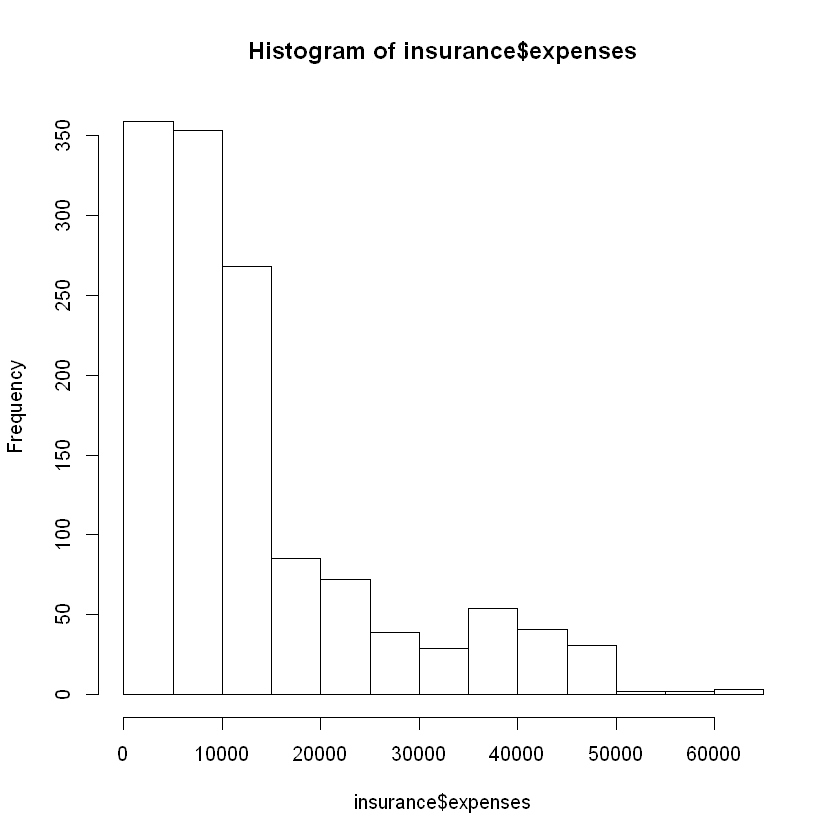

In [161]:
hist(insurance$expenses)

In [162]:
table(insurance$region)


northeast northwest southeast southwest 
      324       325       364       325 

###### Exploring relationships among features

In [163]:
# Correlation matrix
cor(insurance[c('age', 'bmi', 'children', 'expenses')])

,age,bmi,children,expenses
age,1.0000000,0.10934101,0.04246900,0.29900819
bmi,0.1093410,1.00000000,0.01264471,0.19857626
children,0.0424690,0.01264471,1.00000000,0.06799823
expenses,0.2990082,0.19857626,0.06799823,1.00000000


###### Visualizing relationships among features

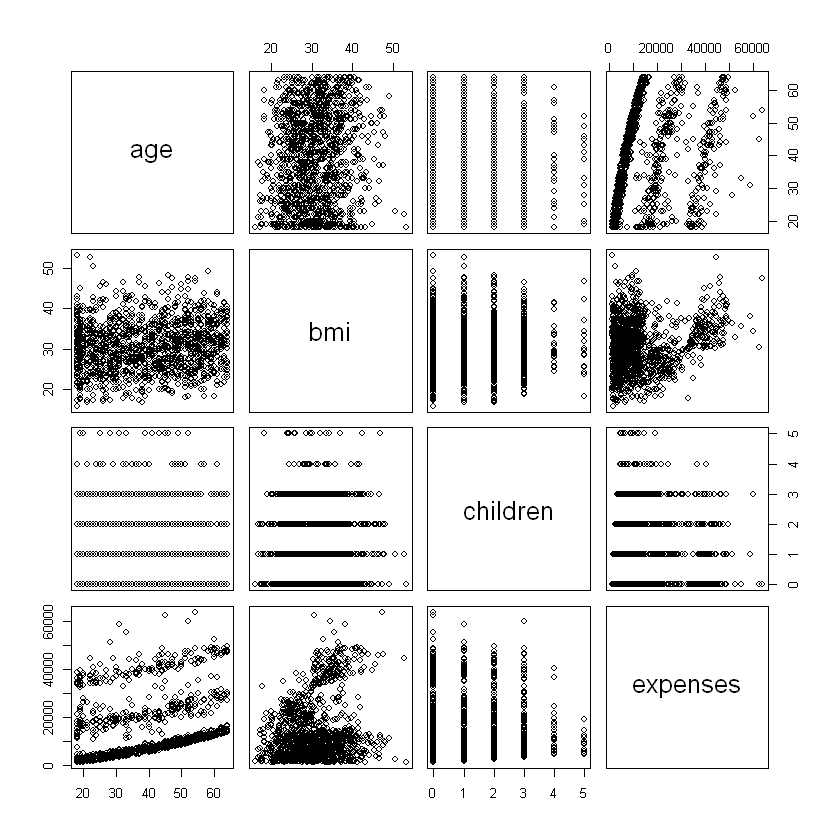

In [164]:
# Scatterplot matrix
pairs(insurance[c('age', 'bmi', 'children', 'expenses')])

In [165]:
#add more information to the plot using pairs.panel() function
install.packages("psych")

Installing package into 'C:/Users/Pappu/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.2.5             FALSE



installing the source package 'psych'



In [166]:
library(psych)

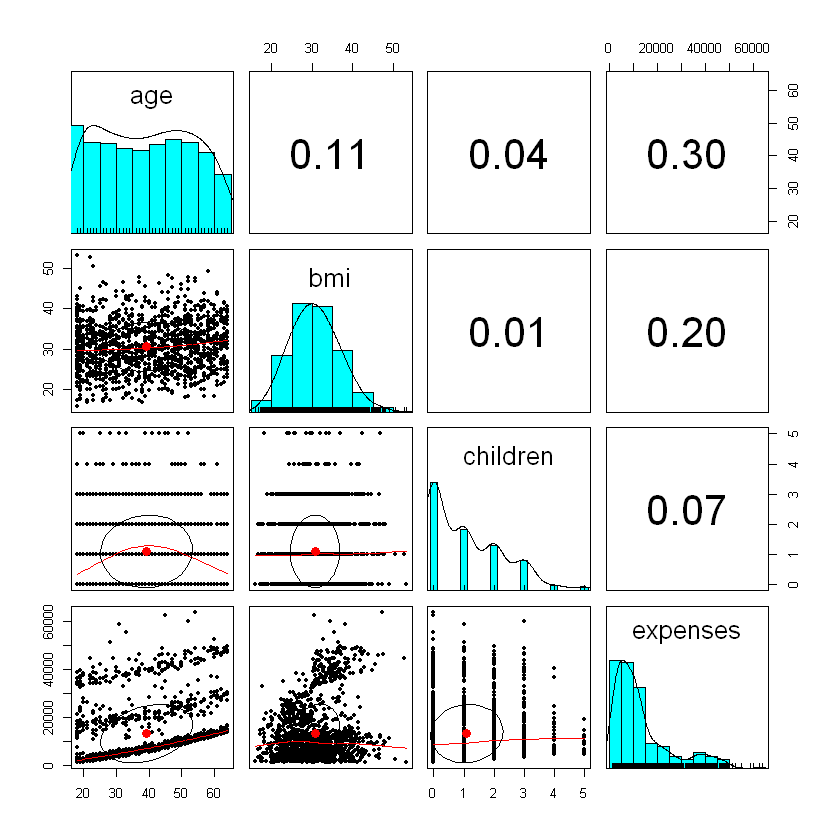

In [167]:
pairs.panels(insurance[c("age", "bmi", "children", "expenses")])

###### Training a model on the data

In [168]:
ins_model <- lm(expenses ~ age + children + sex + bmi + smoker + region, data = insurance)

In [169]:
# This following command is equivalent to the preceding command.
# ins_model <- lm(expenses ~ ., data = insurance)

In [170]:
ins_model


Call:
lm(formula = expenses ~ age + children + sex + bmi + smoker + 
    region, data = insurance)

Coefficients:
    (Intercept)              age         children          sexmale  
       -11941.6            256.8            475.7           -131.4  
            bmi        smokeryes  regionnorthwest  regionsoutheast  
          339.3          23847.5           -352.8          -1035.6  
regionsouthwest  
         -959.3  


#### Evaluating model performance

In [171]:
summary(ins_model)


Call:
lm(formula = expenses ~ age + children + sex + bmi + smoker + 
    region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11941.6      987.8 -12.089  < 2e-16 ***
age                256.8       11.9  21.586  < 2e-16 ***
children           475.7      137.8   3.452 0.000574 ***
sexmale           -131.3      332.9  -0.395 0.693255    
bmi                339.3       28.6  11.864  < 2e-16 ***
smokeryes        23847.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -352.8      476.3  -0.741 0.458976    
regionsoutheast  -1035.6      478.7  -2.163 0.030685 *  
regionsouthwest   -959.3      477.9  -2.007 0.044921 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 

#### Improving model performance

In [172]:
# Model specification – adding non-linear relationships
insurance$age2 <- insurance$age^2

In [173]:
# Transformation – converting a numeric variable to a binary indicator
insurance$bmi30 <- ifelse(insurance$bmi >= 30, 1, 0)

###### Putting all together for an improved regression model (also adding with interaction effect)
* Added a non-linear term for age
* Created an indicator for obesity
* Specified an interaction between obesity and smoking


In [174]:
ins_model2 <- lm(expenses ~ age + age2 + sex + bmi + children + bmi30*smoker + region, data = insurance)

In [175]:
# summarize the results
summary(ins_model2)


Call:
lm(formula = expenses ~ age + age2 + sex + bmi + children + bmi30 * 
    smoker + region, data = insurance)

Residuals:
     Min       1Q   Median       3Q      Max 
-17297.1  -1656.0  -1262.7   -727.8  24161.6 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       139.0053  1363.1359   0.102 0.918792    
age               -32.6181    59.8250  -0.545 0.585690    
age2                3.7307     0.7463   4.999 6.54e-07 ***
sexmale          -496.7690   244.3713  -2.033 0.042267 *  
bmi               119.7715    34.2796   3.494 0.000492 ***
children          678.6017   105.8855   6.409 2.03e-10 ***
bmi30            -997.9355   422.9607  -2.359 0.018449 *  
smokeryes       13404.5952   439.9591  30.468  < 2e-16 ***
regionnorthwest  -279.1661   349.2826  -0.799 0.424285    
regionsoutheast  -828.0345   351.6484  -2.355 0.018682 *  
regionsouthwest -1222.1619   350.5314  -3.487 0.000505 ***
bmi30:smokeryes 19810.1534   604.6769  32.762  < 2e-16 ***

###### Relative to our first model, the R-squared value has improved from 0.75 to about 0.87. Our model is now explaining 87 percent of the variation in medical treatment costs. 

In [176]:
tail(insurance)

,age,sex,bmi,children,smoker,region,expenses,age2,bmi30
1333,52,female,44.7,3,no,southwest,11411.69,2704,1
1334,50,male,31.0,3,no,northwest,10600.55,2500,1
1335,18,female,31.9,0,no,northeast,2205.98,324,1
1336,18,female,36.9,0,no,southeast,1629.83,324,1
1337,21,female,25.8,0,no,southwest,2007.95,441,0
1338,61,female,29.1,0,yes,northwest,29141.36,3721,0


In [177]:
# split the training and test dataset
ins_train <- insurance[1:1000, ]
ins_test <- insurance[1001:1338, ] 

In [178]:
tail(credit_train)

,age2,sex,bmi,children,bmi30,smoker,region
995,729,female,20.0,3,0,yes,northwest
996,1521,female,23.3,3,0,no,northeast
997,1521,female,34.1,3,1,no,southwest
998,3969,female,36.9,0,1,no,southeast
999,1089,female,36.3,3,1,no,northeast
1000,1296,female,26.9,0,0,no,northwest


In [179]:
ins_model3 <- lm(expenses ~ ., data = ins_train)

# making predictions with the regression model

In [180]:
pred <- predict(ins_model3, ins_test)
cor(pred, ins_test$expenses)

[1] 0.8647014

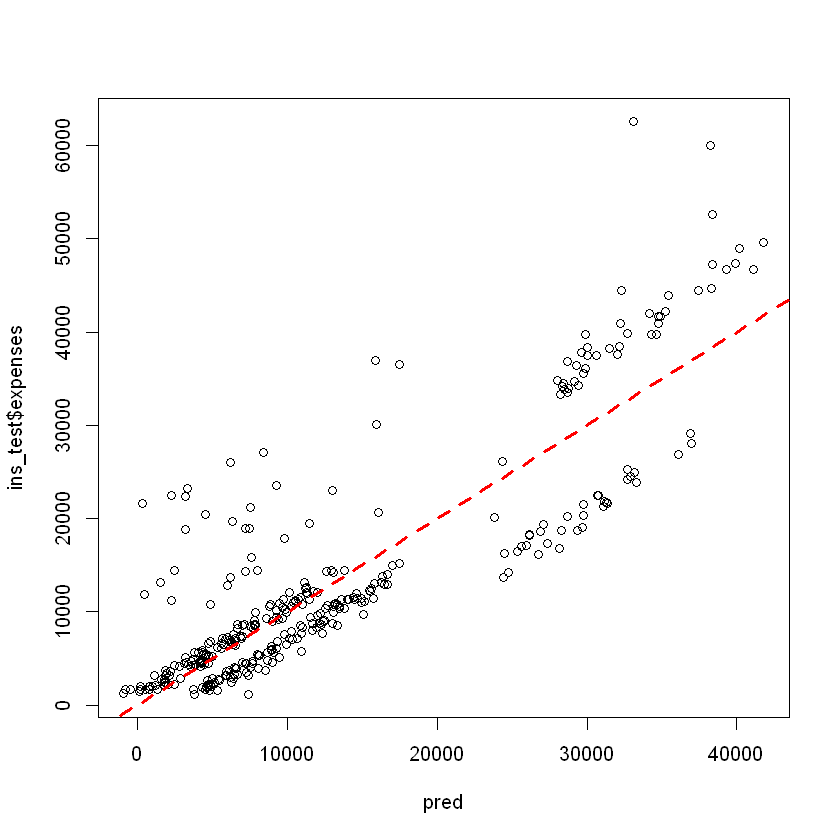

In [181]:
plot(pred, ins_test$expenses)
abline(a = 0, b = 1, col = "red", lwd = 3, lty = 2)

### Final prediction

In [182]:
prediction1 <- predict(ins_model3,
        data.frame(age = 30, age2 = 30^2, children = 2,
                   bmi = 30, sex = "male", bmi30 = 1,
                   smoker = "no", region = "northeast"))

In [183]:
prediction1/100

1 
75.52454

In [184]:
prediction2 <- predict(ins_model3,
        data.frame(age = 30, age2 = 30^2, children = 2,
                   bmi = 30, sex = "female", bmi30 = 1,
                   smoker = "no", region = "northeast"))

In [185]:
prediction2/100

1 
78.72071

In [186]:
prediction3 <- predict(ins_model3,
        data.frame(age = 30, age2 = 30^2, children = 0,
                   bmi = 30, sex = "female", bmi30 = 1,
                   smoker = "no", region = "northeast"))


In [187]:
prediction3/100

1 
68.43615